In [34]:
!python Model.py

Training with 1 CPU core(s)
Epoch 1/5
----------
Train Epoch 1/5: 100%|██████████████████████████| 24/24 [10:12<00:00, 25.51s/it]
Train Loss: 0.0268 Acc: 0.9977
Val Loss: 0.4128 Acc: 0.8541
Epoch 2/5
----------
Train Epoch 2/5: 100%|██████████████████████████| 24/24 [10:11<00:00, 25.49s/it]
Train Loss: 0.0270 Acc: 0.9980
Val Loss: 0.4128 Acc: 0.8526
Epoch 3/5
----------
Train Epoch 3/5: 100%|██████████████████████████| 24/24 [10:21<00:00, 25.89s/it]
Train Loss: 0.0282 Acc: 0.9984
Val Loss: 0.4129 Acc: 0.8549
Epoch 4/5
----------
Train Epoch 4/5: 100%|██████████████████████████| 24/24 [10:32<00:00, 26.36s/it]
Train Loss: 0.0293 Acc: 0.9972
Val Loss: 0.4121 Acc: 0.8549
Epoch 5/5
----------
Train Epoch 5/5: 100%|██████████████████████████| 24/24 [10:32<00:00, 26.35s/it]
Train Loss: 0.0294 Acc: 0.9972
Val Loss: 0.4133 Acc: 0.8564
Training complete in 63m 44s
Best val Acc: 0.856383
Training metrics:
train_loss: [0.02679634719746175, 0.027033747469677644, 0.028160781315923516, 0.029348127531

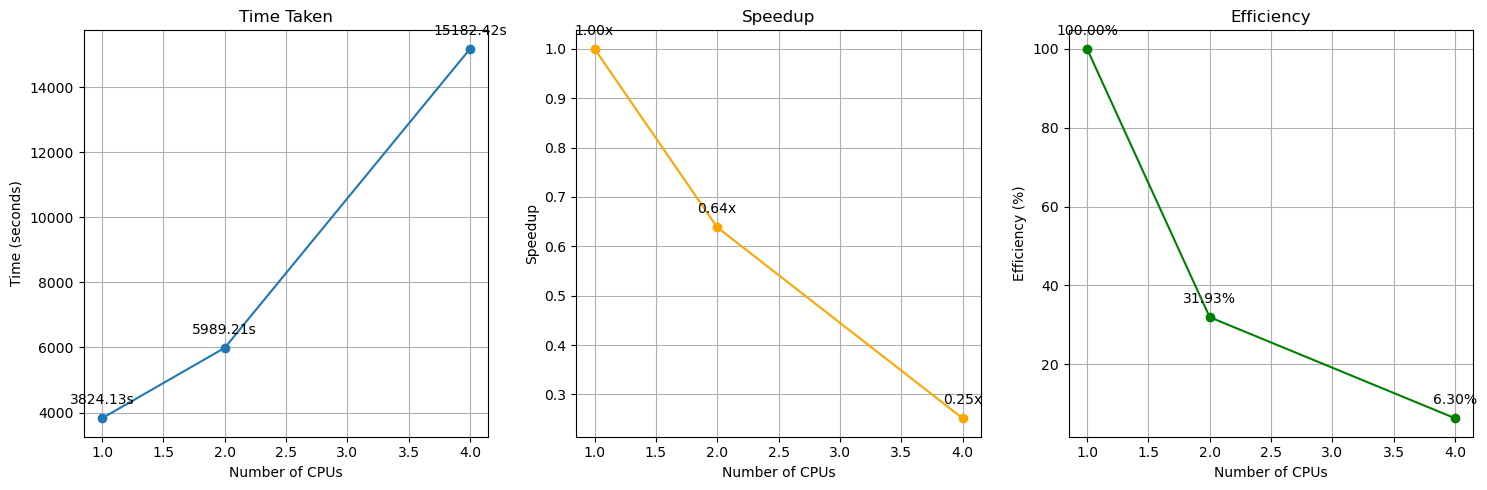

In [35]:
import matplotlib.pyplot as plt

# Metrics for each CPU core configuration
cpu_counts = [1, 2, 4]
time_taken = [3824.1251080036163, 5989.21058678627, 15182.41613984108]
train_loss = [[0.02679634719746175, 0.027033747469677644, 0.028160781315923516, 0.02934812753175209, 0.029387639638255626],
              [0.02978736949366292, 0.02767020451282364, 0.027341609068360983, 0.03007842492239148, 0.028235537057218988],
              [0.0263220188420972, 0.02824700074209497, 0.02698867288144196, 0.028878846294642276, 0.02901023863236499]]
val_loss = [[0.41284631713545433, 0.4128081921748477, 0.4129368053200035, 0.4120978102495605, 0.4132972629599296],
            [0.4120056192563298, 0.4117863164212566, 0.4114716813919392, 0.4129756906474615, 0.4123591517967294],
            [0.41431629331640923, 0.4118479479410003, 0.4122597924391187, 0.4111054802375724, 0.4143700835190283]]
train_acc = [[0.9977124183006536, 0.9980392156862745, 0.9983660130718954, 0.9972222222222222, 0.9972222222222222],
             [0.9983660130718954, 0.9986928104575163, 0.9985294117647059, 0.9972222222222222, 0.9985294117647059],
             [0.9985294117647059, 0.9988562091503268, 0.9988562091503268, 0.9985294117647059, 0.9977124183006536]]
val_acc = [[0.8541033434650456, 0.8525835866261399, 0.8548632218844985, 0.8548632218844985, 0.8563829787234043],
           [0.8533434650455927, 0.8533434650455927, 0.8541033434650456, 0.8571428571428571, 0.851823708206687],
           [0.8548632218844985, 0.8548632218844985, 0.8571428571428571, 0.8571428571428571, 0.851823708206687]]

# Calculate speedup and efficiency
speedup = [time_taken[0] / t for t in time_taken]
efficiency = [(s / c) * 100 for s, c in zip(speedup, cpu_counts)]

# Plotting the time taken with values displayed
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(cpu_counts, time_taken, marker='o')
for i, txt in enumerate(time_taken):
    plt.annotate(f"{txt:.2f}s", (cpu_counts[i], time_taken[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title("Time Taken")
plt.xlabel("Number of CPUs")
plt.ylabel("Time (seconds)")
plt.grid(True)

# Plotting the speedup with values displayed
plt.subplot(1, 3, 2)
plt.plot(cpu_counts, speedup, marker='o', color='orange')
for i, txt in enumerate(speedup):
    plt.annotate(f"{txt:.2f}x", (cpu_counts[i], speedup[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title("Speedup")
plt.xlabel("Number of CPUs")
plt.ylabel("Speedup")
plt.grid(True)

# Plotting the efficiency with values displayed
plt.subplot(1, 3, 3)
plt.plot(cpu_counts, efficiency, marker='o', color='green')
for i, txt in enumerate(efficiency):
    plt.annotate(f"{txt:.2f}%", (cpu_counts[i], efficiency[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title("Efficiency")
plt.xlabel("Number of CPUs")
plt.ylabel("Efficiency (%)")
plt.grid(True)

plt.tight_layout()
plt.show()


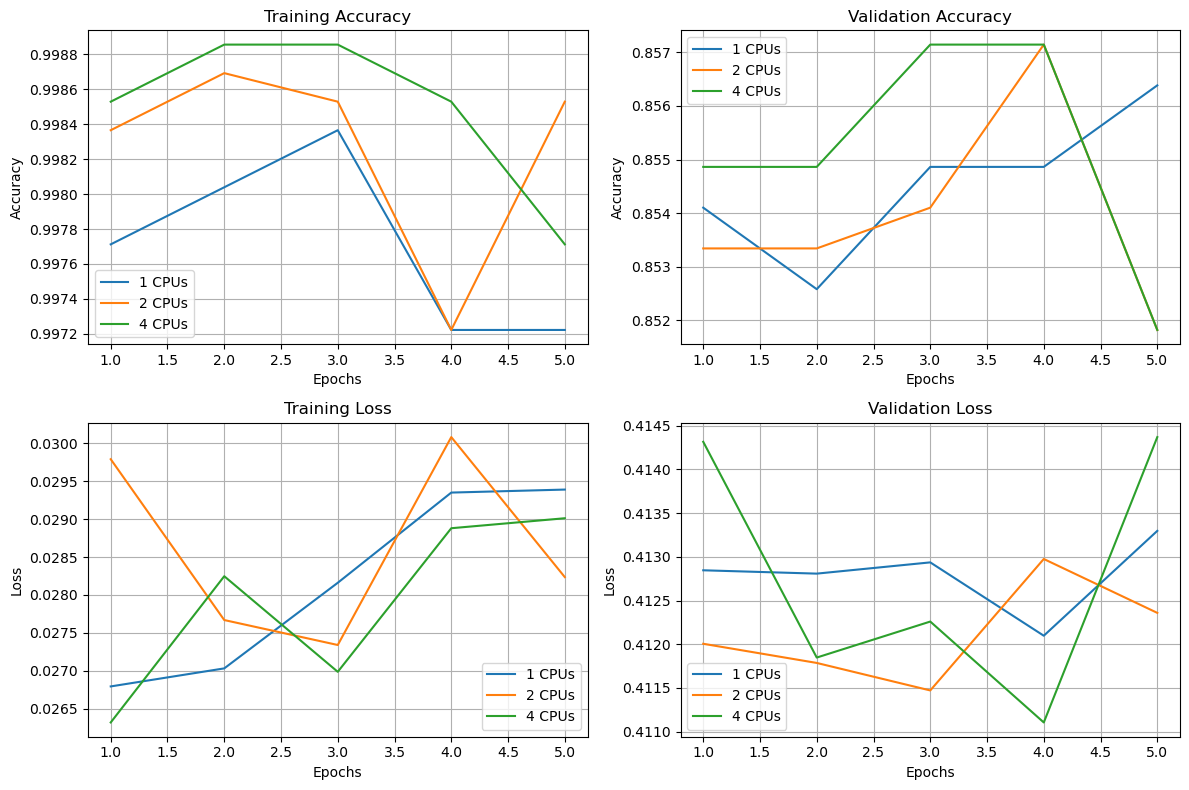

In [36]:
# Plotting training and validation accuracies
plt.figure(figsize=(12, 8))

# Plotting training and validation accuracies
plt.subplot(2, 2, 1)
for i in range(len(cpu_counts)):
    plt.plot(range(1, len(train_acc[i]) + 1), train_acc[i], label=f'{cpu_counts[i]} CPUs')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for i in range(len(cpu_counts)):
    plt.plot(range(1, len(val_acc[i]) + 1), val_acc[i], label=f'{cpu_counts[i]} CPUs')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
# Plotting training and validation losses
for i in range(len(cpu_counts)):
    plt.plot(range(1, len(train_loss[i]) + 1), train_loss[i], label=f'{cpu_counts[i]} CPUs')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
for i in range(len(cpu_counts)):
    plt.plot(range(1, len(val_loss[i]) + 1), val_loss[i], label=f'{cpu_counts[i]} CPUs')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
